In [1]:
import warnings

import sys

from src.preprocessing.agg_invoice import agg_invoice_num_mode_no_monthly_weighting
from src.models.basemodel import basemodel_predict_proba
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

from sklearn.svm import SVC
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Define a plotting style to be used for all plots in this notebook
plt.style.use('tableau-colorblind10')

#from sqalchemy import create_engine
#from dotenv import load_dotenv

In [2]:
df_client_train = pd.read_csv('data/train/client_train.csv')
df_invoice_train = pd.read_csv('data/train/invoice_train.csv')

In [3]:
display(df_invoice_train.info(),df_invoice_train.describe(),df_invoice_train.shape,df_invoice_train.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


None

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000
mean,20.128,123058699065.183,172.488,7.322,1.003,410.979,109.322,20.306,52.926,17766.998,18349.705,44.831
std,13.473,1657267274261.927,133.887,1.572,0.308,757.308,1220.123,157.424,875.472,40366.926,40953.206,3128.335
min,8.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,11.000,121108.000,5.000,6.000,1.000,79.000,0.000,0.000,0.000,1791.000,2056.000,4.000
50%,11.000,494561.000,203.000,8.000,1.000,274.000,0.000,0.000,0.000,7690.000,8192.000,4.000
75%,40.000,1115161.000,207.000,9.000,1.000,600.000,0.000,0.000,0.000,21660.000,22343.000,4.000
max,45.000,27981145458733.000,600.000,413.000,50.000,999910.000,999073.000,64492.000,547946.000,2800280.000,2870972.000,636624.000


(4476749, 16)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC
5,train_Client_0,2017-07-17,11,1335667,0,207,9,1,314,0,0,0,15638,15952,8,ELEC
6,train_Client_0,2018-12-07,11,1335667,0,207,9,1,541,0,0,0,15952,16493,12,ELEC
7,train_Client_0,2019-03-19,11,1335667,0,207,9,1,585,0,0,0,16493,17078,8,ELEC
8,train_Client_0,2011-07-22,11,1335667,0,203,9,1,1200,186,0,0,7770,9156,4,ELEC
9,train_Client_0,2011-11-22,11,1335667,0,203,6,1,1082,0,0,0,9156,10238,4,ELEC


In [4]:
df_invoice_train.counter_number.nunique()

201893

In [5]:
# find client with most invoices

df_invoice_train['client_id'].value_counts().head(20)

client_id
train_Client_116878    439
train_Client_9263      380
train_Client_130245    327
train_Client_59131     317
train_Client_61728     310
train_Client_56894     309
train_Client_50639     308
train_Client_4207      307
train_Client_107082    298
train_Client_23141     296
train_Client_21518     293
train_Client_17705     284
train_Client_119751    281
train_Client_103744    280
train_Client_64678     275
train_Client_26663     275
train_Client_84957     275
train_Client_79926     274
train_Client_14725     272
train_Client_42602     272
Name: count, dtype: int64

In [6]:
# convert invoice_date to datetime format
df_invoice_train['invoice_date'] = pd.to_datetime(df_invoice_train['invoice_date'])

In [7]:
# join both datasets by client_id
df_combined = pd.merge(df_client_train, df_invoice_train, on='client_id', how='inner')
df_combined.head(30)

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.000,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.000,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.000,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,31/12/1994,0.000,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,31/12/1994,0.000,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC
5,60,train_Client_0,11,101,31/12/1994,0.000,2017-07-17,11,1335667,0,...,9,1,314,0,0,0,15638,15952,8,ELEC
6,60,train_Client_0,11,101,31/12/1994,0.000,2018-12-07,11,1335667,0,...,9,1,541,0,0,0,15952,16493,12,ELEC
7,60,train_Client_0,11,101,31/12/1994,0.000,2019-03-19,11,1335667,0,...,9,1,585,0,0,0,16493,17078,8,ELEC
8,60,train_Client_0,11,101,31/12/1994,0.000,2011-07-22,11,1335667,0,...,9,1,1200,186,0,0,7770,9156,4,ELEC
9,60,train_Client_0,11,101,31/12/1994,0.000,2011-11-22,11,1335667,0,...,6,1,1082,0,0,0,9156,10238,4,ELEC


In [8]:
#Getting unique values on the invoice train data
for col in df_combined.columns:
    print(f"{col} - {df_combined[col].nunique()}")

disrict - 4
client_id - 135493
client_catg - 3
region - 25
creation_date - 8088
target - 2
invoice_date - 8275
tarif_type - 17
counter_number - 201893
counter_statue - 16
counter_code - 42
reading_remarque - 8
counter_coefficient - 16
consommation_level_1 - 8295
consommation_level_2 - 12576
consommation_level_3 - 2253
consommation_level_4 - 12075
old_index - 155648
new_index - 157980
months_number - 1370
counter_type - 2


In [9]:
df_combined.isnull().sum()

disrict                 0
client_id               0
client_catg             0
region                  0
creation_date           0
target                  0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

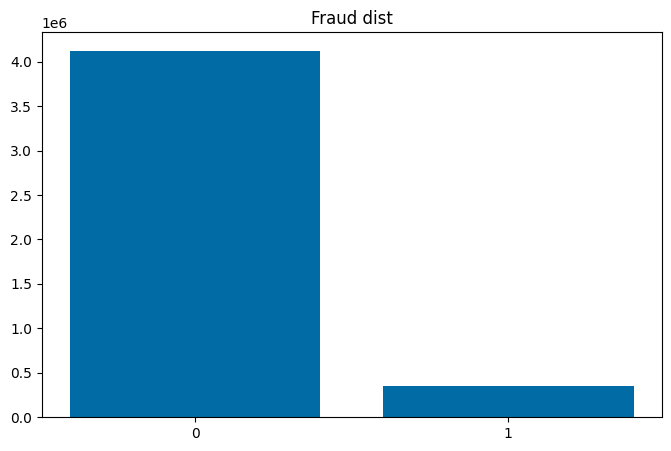

In [10]:
#Plot fraud vs non-fraud
frauds = df_combined.groupby(['target'])['client_id'].count()
plt.bar(x=frauds.index, height=frauds.values, tick_label = [0,1])
plt.title('Fraud dist')
plt.show()

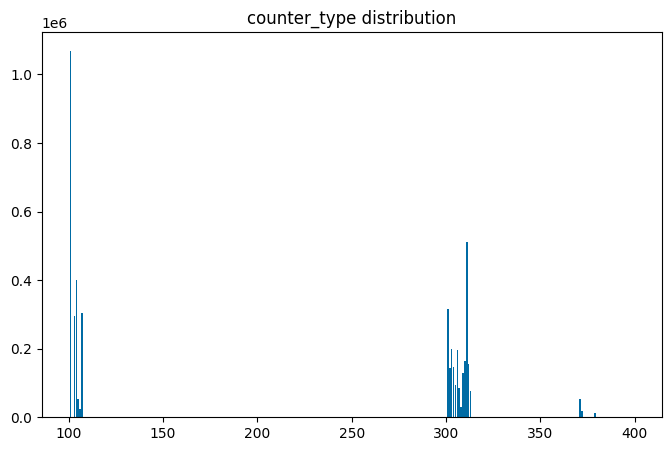

In [11]:
#Plot customers on regions
region = df_combined.groupby(['region'])['client_id'].count()
plt.bar(x=region.index, height=region.values)
plt.title(col+' distribution')
plt.show()

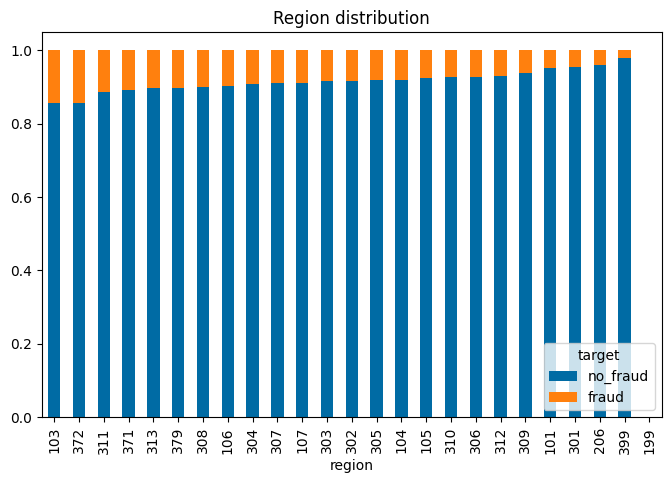

In [12]:
#Plot region distribution for fraud vs non-fraud
region = df_combined.groupby(['region', 'target'])['client_id'].count().reset_index()
region = region.pivot(index='region', columns='target', values='client_id')
region['total'] = region[0] + region[1]
region['no_fraud'] = region[0] / region['total']
region['fraud'] = region[1] / region['total']
region = region.sort_values(by='no_fraud')
region[['no_fraud', 'fraud']].plot.bar(stacked=True)
plt.title('Region distribution')
plt.show()

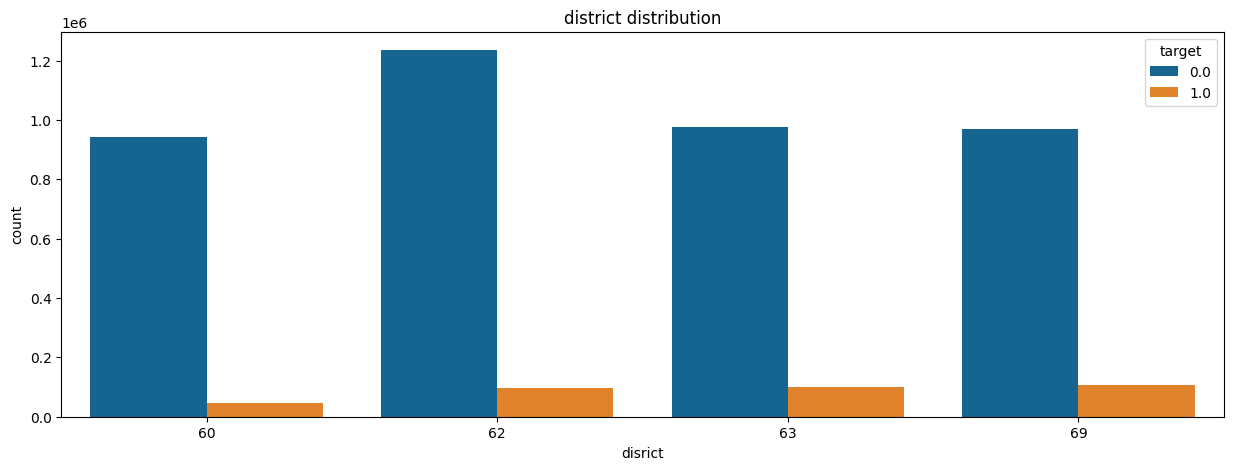

In [13]:
#Plot district distribution for fraud vs non-fraud

region_fraud = df_combined.groupby(['disrict','target'])['client_id'].count().reset_index()
region_fraud.columns = ['disrict','target','count']
region_fraud.head()
plt.figure(figsize=(15,5))
sns.barplot(x='disrict', y='count', hue='target', data=region_fraud)
plt.title('district distribution')   
plt.show()

In [14]:
# convert invoice_date to datetime format
df_combined['invoice_date'] = pd.to_datetime(df_combined['invoice_date'])
df_combined['invoice_date'] = df_combined['invoice_date'].dt.date

In [15]:
# Minimal report
'''from ydata_profiling import ProfileReport
profile = ProfileReport(df_invoice_train, title= 'Minimal_Profiling_report', minimal=True)
profile.to_file("Fraud_detection_invoice_report_minimal.html")
profile'''

'from ydata_profiling import ProfileReport\nprofile = ProfileReport(df_invoice_train, title= \'Minimal_Profiling_report\', minimal=True)\nprofile.to_file("Fraud_detection_invoice_report_minimal.html")\nprofile'

In [16]:
display(df_client_train.info(),df_client_train.describe(),df_client_train.shape,df_client_train.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


None

,disrict,client_catg,region,target
count,135493.000,135493.000,135493.000,135493.000
mean,63.511,11.513,206.160,0.056
std,3.354,4.424,104.207,0.230
min,60.000,11.000,101.000,0.000
25%,62.000,11.000,103.000,0.000
50%,62.000,11.000,107.000,0.000
75%,69.000,11.000,307.000,0.000
max,69.000,51.000,399.000,1.000


(135493, 6)

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.000
1,69,train_Client_1,11,107,29/05/2002,0.000
2,62,train_Client_10,11,301,13/03/1986,0.000
3,69,train_Client_100,11,105,11/07/1996,0.000
4,62,train_Client_1000,11,303,14/10/2014,0.000
5,69,train_Client_10000,11,103,29/09/1993,0.000
6,62,train_Client_100000,11,309,07/06/2012,0.000
7,60,train_Client_100001,11,101,12/04/2006,0.000
8,62,train_Client_100002,11,301,31/12/2006,0.000
9,60,train_Client_100003,11,101,25/10/2011,0.000


In [17]:
#
cols_to_agg_num = ["consommation_level_1","consommation_level_2",
               "consommation_level_3","consommation_level_4",
               "counter_coefficient",
               "months_number", "invoice_date"
               ]
cols_to_agg_mode = ["tarif_type", "counter_statue", "counter_code", "reading_remarque", "counter_type"] 
df_num =df_invoice_train.head(1000).groupby("client_id")[cols_to_agg_num].agg("mean")
df_mode = df_invoice_train.head(1000).groupby("client_id")[cols_to_agg_mode].apply(lambda x: x.mode().iloc[0])
df_ges = pd.concat([df_num,df_mode], axis=1)
df_ges

,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,counter_coefficient,months_number,invoice_date,tarif_type,counter_statue,counter_code,reading_remarque,counter_type
client_id,,,,,,,,,,,,
train_Client_0,352.400,10.571,0.000,0.000,1.000,4.629,2011-09-02 18:30:51.428571392,11.000,0,203.000,6.000,ELEC
train_Client_1,557.541,0.000,0.000,0.000,1.000,4.324,2012-03-20 20:45:24.324324352,11.000,0,203.000,6.000,ELEC
train_Client_10,798.611,37.889,0.000,0.000,1.000,6.444,2011-06-11 05:20:00.000000000,11.000,0,203.000,6.000,ELEC
train_Client_100,1.200,0.000,0.000,0.000,1.000,4.200,2009-01-07 18:00:00.000000000,11.000,0,413.000,6.000,ELEC
train_Client_1000,663.714,104.857,117.357,36.714,1.000,3.714,2017-06-04 01:42:51.428571392,11.000,0,207.000,9.000,ELEC
train_Client_10000,352.104,10.438,3.771,0.000,1.000,4.000,2012-12-25 02:30:00.000000000,11.000,0,203.000,9.000,ELEC
train_Client_100000,280.025,6.550,0.000,0.000,1.000,3.700,2016-03-12 06:00:00.000000000,11.000,0,5.000,9.000,ELEC
train_Client_100001,327.500,0.923,0.000,0.000,1.000,3.872,2013-02-14 20:55:23.076923136,11.000,0,203.000,6.000,ELEC
train_Client_100002,112.500,0.000,0.000,0.000,1.000,4.000,2007-05-27 00:00:00.000000000,11.000,0,413.000,6.000,ELEC


In [18]:
def agg_invoice_num_mode_no_monthly_weighting(
        df_invoice,
        cols_to_agg_num=["consommation_level_1","consommation_level_2",
                          "consommation_level_3","consommation_level_4",
                          "counter_coefficient", "months_number",
                          "invoice_date"
                         ],
        cols_to_agg_mode = ["tarif_type", "counter_statue",
                            "counter_code", "reading_remarque",
                            "counter_type"],
        num_agg = "mean"):
    df_num = df_invoice.groupby("client_id")[cols_to_agg_num].agg(num_agg)
    df_mode = df_invoice.groupby("client_id")[cols_to_agg_mode].apply(lambda x: x.mode().iloc[0])
    df_ges = pd.concat([df_num,df_mode], axis=1)
    df_ges.reset_index(inplace=True)
    return df_ges



In [19]:
df_ges =agg_invoice_num_mode_no_monthly_weighting(df_invoice_train)
df_ges


,client_id,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,counter_coefficient,months_number,invoice_date,tarif_type,counter_statue,counter_code,reading_remarque,counter_type
0,train_Client_0,352.400,10.571,0.000,0.000,1.000,4.629,2011-09-02 18:30:51.428571392,11.000,0,203.000,6.000,ELEC
1,train_Client_1,557.541,0.000,0.000,0.000,1.000,4.324,2012-03-20 20:45:24.324324352,11.000,0,203.000,6.000,ELEC
2,train_Client_10,798.611,37.889,0.000,0.000,1.000,6.444,2011-06-11 05:20:00.000000000,11.000,0,203.000,6.000,ELEC
3,train_Client_100,1.200,0.000,0.000,0.000,1.000,4.200,2009-01-07 18:00:00.000000000,11.000,0,413.000,6.000,ELEC
4,train_Client_1000,663.714,104.857,117.357,36.714,1.000,3.714,2017-06-04 01:42:51.428571392,11.000,0,207.000,9.000,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,train_Client_99995,1.958,0.000,0.000,0.000,1.000,4.225,2013-01-15 18:35:29.577464832,11.000,0,207.000,6.000,ELEC
135489,train_Client_99996,185.854,0.756,0.000,0.000,1.000,3.902,2016-04-16 16:58:32.195121920,40.000,0,5.000,9.000,GAZ
135490,train_Client_99997,273.083,0.000,0.000,0.000,1.000,4.111,2015-03-19 00:00:00.000000000,11.000,0,207.000,9.000,ELEC
135491,train_Client_99998,300.000,70.500,0.000,0.000,1.000,6.000,2005-10-19 00:00:00.000000000,10.000,0,202.000,6.000,ELEC


In [20]:
df_invoice_train

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,ELEC
4476745,train_Client_99998,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,ELEC
4476746,train_Client_99999,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,ELEC
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,ELEC


In [36]:
#basemodel_predict_proba(df_client_train)

y_proba = pd.Series(np.zeros(len(X_train)))
y_proba.index = X_train.index
y_proba

102516   0.000
18927    0.000
123482   0.000
74968    0.000
113742   0.000
          ... 
33932    0.000
26058    0.000
102244   0.000
75972    0.000
52552    0.000
Length: 101619, dtype: float64

In [34]:
X_train.index

Index([102516,  18927, 123482,  74968, 113742,  39205, 110063,  41259,   4808,
        90325,
       ...
       108749, 131285,  43819,  77118, 130698,  33932,  26058, 102244,  75972,
        52552],
      dtype='int64', length=101619)

In [86]:
def basemodel_predict_proba(df:pd.DataFrame)->pd.Series:
    y_pred = (df.client_catg == 51)  | (df.counter_code.isin([40,25])) #| ((df.consommation_level_1 <10000)& (df.consommation_level_2 <10000)& (df.consommation_level_3 <10000)& (df.consommation_level_4 <10000))
    y_proba = pd.Series(np.zeros(len(df)))
    y_proba.index = df.index
    y_proba[y_pred] = 1
    return y_proba

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [52]:
df_client = df_client_train
df_inv =agg_invoice_num_mode_no_monthly_weighting(df_invoice_train)
df_ges = pd.merge(df_client, df_inv, on='client_id', how='inner')


In [53]:
df_ges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   disrict               135493 non-null  int64         
 1   client_id             135493 non-null  object        
 2   client_catg           135493 non-null  int64         
 3   region                135493 non-null  int64         
 4   creation_date         135493 non-null  object        
 5   target                135493 non-null  float64       
 6   consommation_level_1  135493 non-null  float64       
 7   consommation_level_2  135493 non-null  float64       
 8   consommation_level_3  135493 non-null  float64       
 9   consommation_level_4  135493 non-null  float64       
 10  counter_coefficient   135493 non-null  float64       
 11  months_number         135493 non-null  float64       
 12  invoice_date          135493 non-null  datetime64[ns]
 13 

In [87]:
X = df_ges.drop("target", axis=1)
y = df_ges["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, stratify=y, random_state=11)

y_test_proba = basemodel_predict_proba(X_test)
roc_auc_score(y_test,y_test_proba)

0.5122781967869612

In [62]:
df_ges.counter_code.isin([203])

0          True
1          True
2          True
3         False
4         False
          ...  
135488    False
135489    False
135490    False
135491    False
135492     True
Name: counter_code, Length: 135493, dtype: bool